In [24]:
import pandas as pd
import matplotlib.pyplot as plt


# What data do we have?
data = pd.read_csv("/Users/amir/Downloads/titanic.csv")
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [17]:
# What are some of the data types we are working with?

print(data['Pclass'].dtypes)
print(data['Name'].dtypes)
print(data['Age'].dtypes)
print(data['Cabin'].dtypes)
print(data['Fare'].dtypes)

int64
object
float64
object
float64


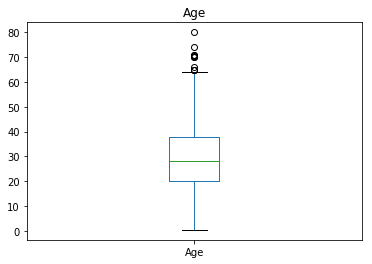

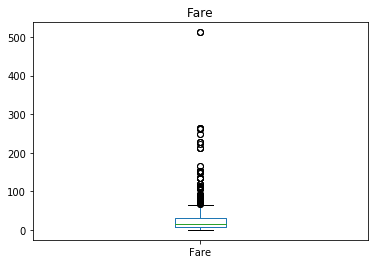

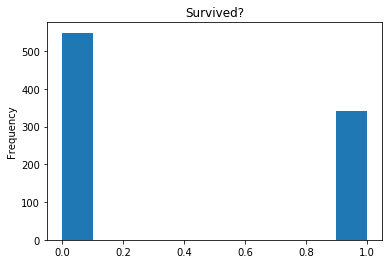

In [49]:
# Let's get ready to plot the numeric features

Survivorship = data['Survived']
Age = data['Age']
Fare = data['Fare']


fig1, ax1 = plt.subplots()
ax1.set_title('Age')
Age.plot('box')

fig2, ax2 = plt.subplots()
ax2.set_title('Fare')
Fare.plot('box')

fig3, ax3 = plt.subplots()
ax3.set_title('Survived?')
Survivorship.plot('hist')

#fig1, ax1 = plt.subplots()
#ax1.set_title('Age')
#ax1.boxplot(Age)

In [48]:
# Summary statistics
print(Fare.describe())
print(Age.describe())
print(Survived.describe())

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64


Age_Survived: 
count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

Age_Deceased: 
count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64


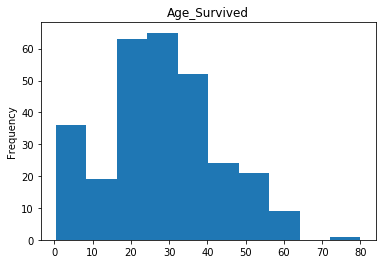

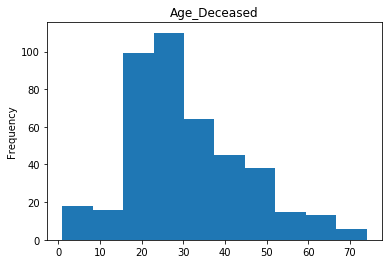

In [69]:
# Now, I want to see if age is in any way correlated with survivorship

criteria_survived = Survivorship == 1
criteria_deceased = Survivorship == 0

age_survived = Age[criteria_survived]
age_deceased = Age[criteria_deceased]

# Let's plot histograms of the ages of each group

fig1, ax1 = plt.subplots()
ax1.set_title('Age_Survived')
age_survived.plot('hist')

print('Age_Survived: ')
print(age_survived.describe())
print('')

fig2,ax2 = plt.subplots()
ax2.set_title('Age_Deceased')
age_deceased.plot('hist')

print('Age_Deceased: ')
print(age_deceased.describe())



Both distributions appear to be skewed right. Their medians are the exact same, but the mean age in the deceased group is a bit higher, even though the max age in the survived group is greater. Although the groups are very similar, we can do a two-sample test to see if the groups differ in any significant way. 

Let Age_Survived be group 1 & Age_Deceased be group 2

Null Hypothesis: Mean1 - Mean2 = 0

Alternate Hypothesis: Mean1 - Mean2 < 0

Alpha-level: 0.05

In [112]:
# Test variables
from math import *
import scipy.stats as ss

age_survived_sample = age_survived.sample(frac=0.1,replace=False,random_state=4)
age_deceased_sample = age_deceased.sample(frac=0.1,replace=False,random_state=4)

mean1 = age_survived_sample.mean()
mean2 = age_deceased_sample.mean()
std1 = age_survived_sample.std()
std2 = age_deceased_sample.std()
var1 = float(std1)**2
var2 = float(std2)**2
m = age_survived_sample.count()
n = age_deceased_sample.count()
df = m + n - 2 # Older formula, but okay approximation

sigma = sqrt((var1/m) + (var2/n)) # combined standard deviation

# Test statistic
t = (mean1 - mean2)/sigma

# P-value
p = ss.t.cdf(t,df)

print('p = ' + str(p))

print('mean1 = ' + str(mean1))
print('mean2 = ' + str(mean2))

print('var1 = ' + str(var1))
print('var2 = ' + str(var2))

print('count1 =' + str(m))
print('count2 =' + str(n))

print('t = ' + str(t))

p = 0.24188437954
mean1 = 31.0
mean2 = 33.5454545455
var1 = 182.64
var2 = 265.96300211416496
count1 =26
count2 =44
t = -0.70410975486
68


With a p-value greater than 0.05, we do not reject the null hypothesis that the mean age of survivors is less than the mean age of those who did not survive. Again, the formula used for degrees of freedom is an older formula, but I think it is a fine approximation for this low stakes test. Also, the variances are quite different between the samples, and this type of t-test isn't the best tool when the variances differ by that much. But, this notebook was simply my exploration of how to use pandas and scipy, so don't treat this like published research. Thank you for reading!